My goal here is to create a simulated grassland plant community where the pathogen network can be tweaked to explore the effects on population dynamics. Firstly I want a version that demonstrates the loss of diversity and evenness when species-specific pathogens are removed.

In [2]:
# Coefficients (from empirical measurements of competition)
lowN = dict(
    pp=1,
    pg=5.43,
    pf=0.96,

    gp=0.5,
    gg=1,
    gf=1.25,

    fp=1.18,
    fg=0.8,
    ff=1
)

highN = dict(
    pp=1,
    pg=3.06,
    pf=0.33,

    gp=0.69,
    gg=1,
    gf=1.25,

    fp=1,
    fg=0.8,
    ff=1
)

In [29]:
# Parameters
length = 50  # field length, book version = 50
width = length
no_steps = 150  # the number of iterations
pop_size = 20  # population size in each cell - somewhere around 10 to 20 is reasonable
               # if 0 switched to non-integer population
simple_kernel = False  # if True, uses the (very simple) dispersal kernel used by Cameron et al.
dispersal_distance = 1.5  # relates to dispersal distance, default = 2
dens_dep = [0.015, 0.6, 0.6]  # strength of competition of a species with itself, NOTE this differs from paper



rattle_intro = 100  # the iteration at which Rhinanthus is introduced
rattle_dens = 0.01  # the initial density of Rhinanthus, ie `pois(lambda = rattle_dens * pop_size)`
w = lowN  # the coefficients used: the options are highN and lowN


wait_time = 80  # iterations before images start being created
image_gap = 1  # number of iterations between images
image_duration = image_gap * 300  # the number of milliseconds occupied by each frame in the GIF generated
total_images = (no_steps - wait_time) / image_gap
n_gap = 100  # gap between printing dispersal matrix cell number

integer population


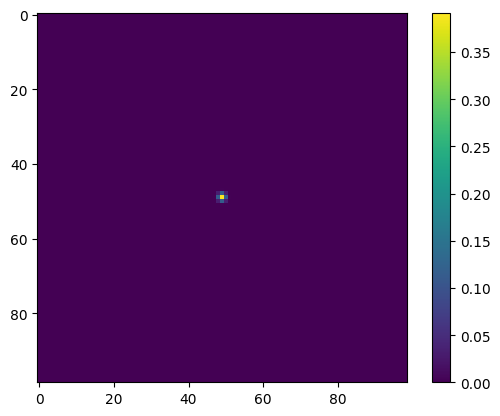

In [30]:
import numpy as np
import math
from collections.abc import Iterable
from matplotlib import pyplot as plt
from PIL import Image
import glob
import random
import imageio

def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:
            yield item

def make_gaussian(size, fwhm=3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4 * np.log(2) * ((x - x0) ** 2 + (y - y0) ** 2) / fwhm ** 2)

if pop_size > 0:
    print('integer population')


    def pop_solve(pops, pop_size, w):
        p = pops[0] * pop_size
        g = pops[1] * pop_size
        f = pops[2] * pop_size

        dp = np.random.poisson(lam=(p * (dens_dep[0] * w['pp'] * p + w['pg'] * g + w['pf'] * f)), size=1)
        dg = np.random.poisson(lam=(g * (w['gp'] * p + dens_dep[1] * w['gg'] * g + w['gf'] * f)), size=1)
        df = np.random.poisson(lam=(f * (w['fp'] * p + w['fg'] * g + dens_dep[2] * w['ff'] * f)), size=1)
        total_pop = dp + dg + df

        dp = dp / total_pop
        dg = dg / total_pop
        df = df / total_pop

        pops = (dp, dg, df)
        return pops

else:
    print('non-integer population')


    def pop_solve(pops, pop_size, w):
        p = pops[0]
        g = pops[1]
        f = pops[2]

        dp = p * (w['pp'] * p + w['pg'] * g + w['pf'] * f) * random.uniform(0.9, 1.1)
        dg = g * (w['gp'] * p + w['gg'] * g + w['gf'] * f) * random.uniform(0.9, 1.1)
        df = f * (w['fp'] * p + w['fg'] * g + w['ff'] * f) * random.uniform(0.9, 1.1)
        totalpop = dp + dg + df

        dp = dp / totalpop
        dg = dg / totalpop
        df = df / totalpop

        pops = (dp, dg, df)
        return (pops)
    
if not simple_kernel:
    # Gaussian dispersal kernel
    kernel_width = 2 * width - 1
    K = make_gaussian(kernel_width, fwhm=dispersal_distance)
    K = K / sum(list(flatten(K)))  # normalise so sum of pdf = 1

else:
    # simple dispersal kernel (as in paper)
    kernel_width = 2 * width - 1
    central_i = math.floor(kernel_width / 2 + 0.5) - 1
    central_j = central_i
    K = np.zeros((kernel_width, kernel_width))
    K[central_i, central_j] = 0.8
    for i, j in (central_i, central_j + 1), (central_i, central_j - 1), (central_i + 1, central_j), (
    central_i - 1, central_j):
        K[i, j] = 0.05

# visualise kernel
plt.imshow(K)
plt.colorbar()
plt.show()

C:\Users\jaked\AppData\Local\Temp\ipykernel_11304\4208553985.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F[n, 0, rattle_intro+1] = np.random.poisson(lam=pop_size * rattle_dens, size=1)


dispersal matrix  0  out of  2500
dispersal matrix  100  out of  2500
dispersal matrix  200  out of  2500
dispersal matrix  300  out of  2500
dispersal matrix  400  out of  2500
dispersal matrix  500  out of  2500
dispersal matrix  600  out of  2500
dispersal matrix  700  out of  2500
dispersal matrix  800  out of  2500
dispersal matrix  900  out of  2500
dispersal matrix  1000  out of  2500
dispersal matrix  1100  out of  2500
dispersal matrix  1200  out of  2500
dispersal matrix  1300  out of  2500
dispersal matrix  1400  out of  2500
dispersal matrix  1500  out of  2500
dispersal matrix  1600  out of  2500
dispersal matrix  1700  out of  2500
dispersal matrix  1800  out of  2500
dispersal matrix  1900  out of  2500
dispersal matrix  2000  out of  2500
dispersal matrix  2100  out of  2500
dispersal matrix  2200  out of  2500
dispersal matrix  2300  out of  2500
dispersal matrix  2400  out of  2500
!!!DISPERSAL MATRIX COMPLETE!!!
iteration  0  out of  150


C:\Users\jaked\AppData\Local\Temp\ipykernel_11304\4208553985.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F[n, taxon, t] = new_pops[taxon]


iteration  1  out of  150
iteration  2  out of  150
iteration  3  out of  150
iteration  4  out of  150
iteration  5  out of  150
iteration  6  out of  150
iteration  7  out of  150
iteration  8  out of  150
iteration  9  out of  150
iteration  10  out of  150
iteration  11  out of  150
iteration  12  out of  150
iteration  13  out of  150
iteration  14  out of  150
iteration  15  out of  150
iteration  16  out of  150
iteration  17  out of  150
iteration  18  out of  150
iteration  19  out of  150
iteration  20  out of  150
iteration  21  out of  150
iteration  22  out of  150
iteration  23  out of  150
iteration  24  out of  150
iteration  25  out of  150
iteration  26  out of  150
iteration  27  out of  150
iteration  28  out of  150
iteration  29  out of  150
iteration  30  out of  150
iteration  31  out of  150
iteration  32  out of  150
iteration  33  out of  150
iteration  34  out of  150
iteration  35  out of  150
iteration  36  out of  150
iteration  37  out of  150
iteration 

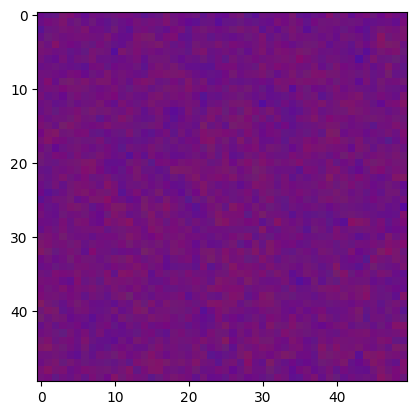

In [31]:
# create field
F = np.zeros((length * width, 3, no_steps))
# set initial cell values - essentially sowing initial seeds
for i in range(0, width):
    for j in range(0, width):
        n = j + width * i
        for taxon in range(1, 3):
            F[n, taxon, 0] = 0.5

# Rhinanthus introduction
for i in range(0, width):
    for j in range(0, width):
        n = j + width * i
        F[n, 0, rattle_intro+1] = np.random.poisson(lam=pop_size * rattle_dens, size=1)

# dispersal matrix
central_i = math.floor(kernel_width / 2 + 0.5) - 1
central_j = central_i
S = np.array([None] * width * length)
for i in range(0, length):
    for j in range(0, width):
        n = j + width * i
        K_prime = K[(central_i - i):(central_i + length - i), (central_j - j):(central_j + width - j)]

        K_prime = list(flatten(K_prime))
        S[n] = np.array(K_prime)

        n_prime = n / n_gap
        if n_prime.is_integer():
            print('dispersal matrix ', n, ' out of ', width * length)
print('!!!DISPERSAL MATRIX COMPLETE!!!')


# run model
image_number = 0
wait_time_complete = False
output = np.zeros((width, length, 3))
for t in range(0, no_steps):
    # competition
    for i in range(0, length):
        for j in range(0, width):
            n = j + width * i

            seeds = F[n, :, t]
            new_pops = pop_solve(seeds, pop_size, w)
            for taxon in range(0, 3):
                F[n, taxon, t] = new_pops[taxon]

    # dispersal
    if t < no_steps - 1:
        for taxon in range(0, 3):
            F[:, taxon, t + 1] += np.matmul(F[:, taxon, t], S)

    # creating images
    if t >= wait_time:
        if not wait_time_complete:
            print('!!!START PRINTING IMAGES!!!')
            wait_time_complete = True
        x = (t - wait_time) / image_gap
        if x.is_integer():  # images are taken every image_gap number of iterations
            for i in range(0, length):
                for j in range(0, width):
                    n = j + width * i
                    output[i, j, :] = F[n, :, t] * 255
            output = output.round().astype(np.uint8)
            filename = 'diff_image/field' + str(int(image_number)) + '.png'
            imageio.imwrite(filename, output)
            image_number = image_number + 1
    print('iteration ', t, ' out of ', no_steps)
print('!!!MODEL RUN COMPLETE!!!')

plt.imshow(output[:, :])
plt.show()


In [32]:
### Creating gif ###
# Create the frames
frames = []
imgs = sorted(glob.glob("diff_image/field*.png"), key=len)
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('diff_image/field.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=image_duration, loop=0)

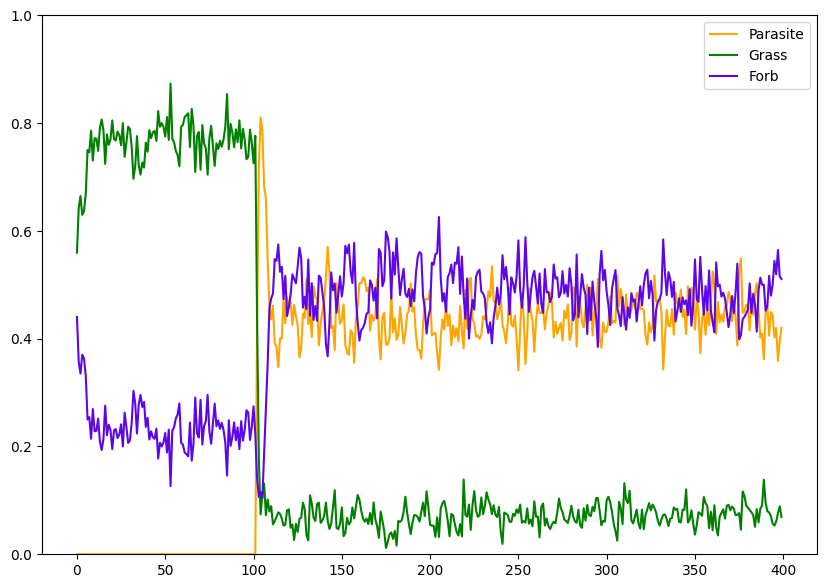

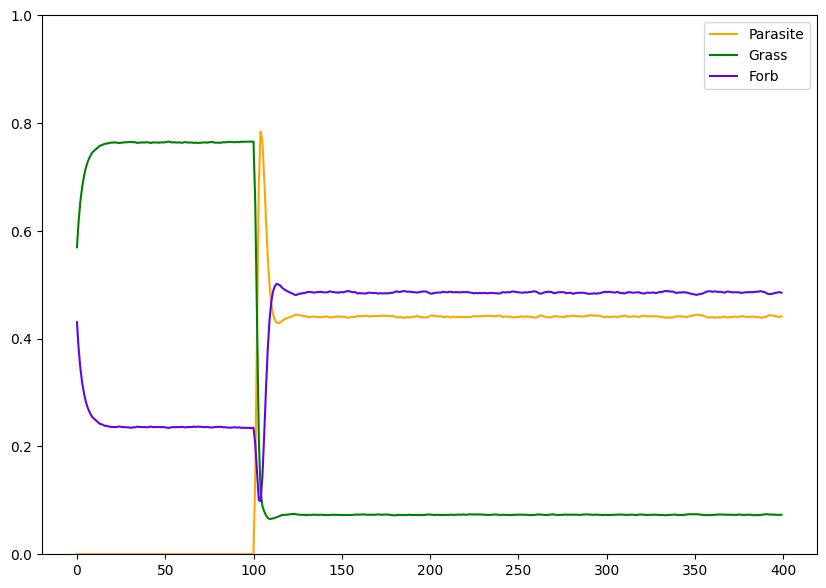

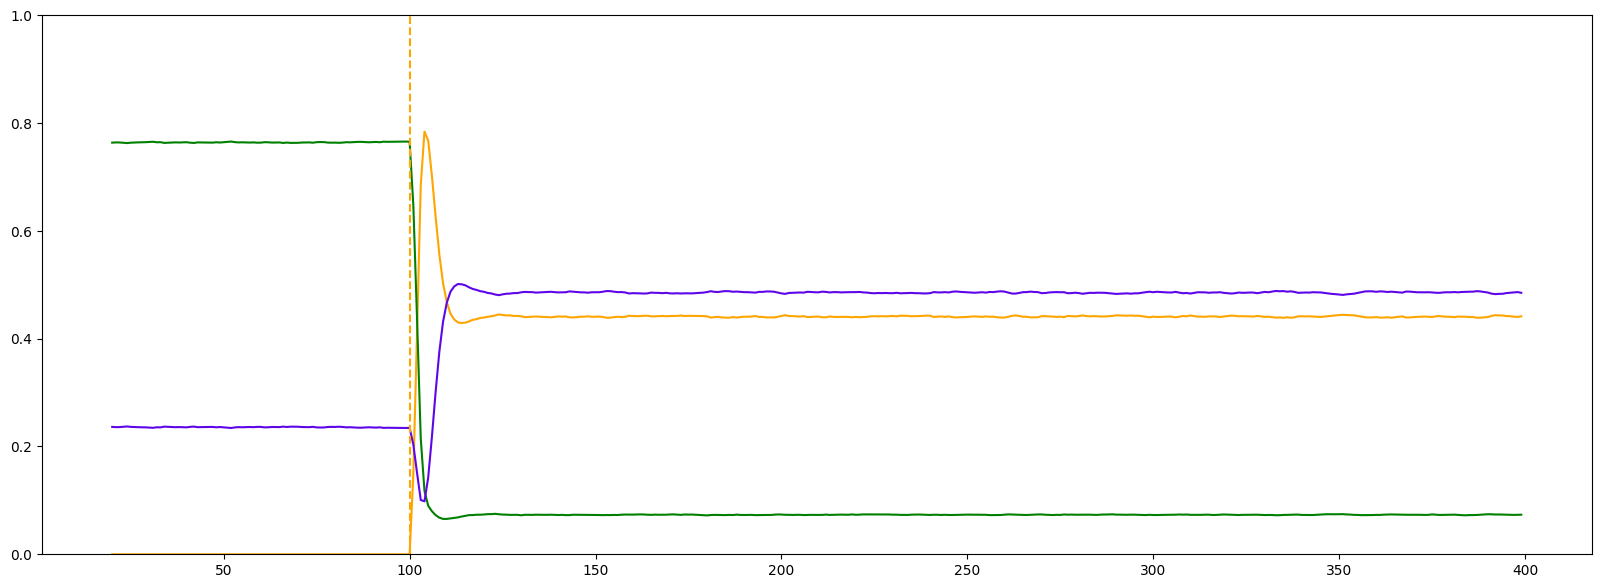

In [11]:

### Graph of species abundance ###
fig, ax0 = plt.subplots(figsize=(10, 7))
fig2, ax1 = plt.subplots(figsize=(10, 7))
fig3, ax2 = plt.subplots(figsize=(20, 7))

# track individual cell (in centre)
Parasite = F[:, 0, :]
Grass = F[:, 1, :]
Forb = F[:, 2, :]
middle_cell = math.floor(width*length/2 + 0.5)-1

ax0.plot(range(0, no_steps), Parasite[middle_cell, :], label='Parasite', color='orange')
ax0.plot(range(0, no_steps), Grass[middle_cell, :], label='Grass', color='green')
ax0.plot(range(0, no_steps), Forb[middle_cell, :], label='Forb', color='xkcd:blue violet')
ax0.set_ylim(0, 1)
ax0.legend()
fig.savefig('diff_image/asinglecell.png')

# mean of field
Parasite_mean = np.zeros(no_steps)
Grass_mean = np.zeros(no_steps)
Forb_mean = np.zeros(no_steps)
for t in range(0, no_steps):
    Parasite_mean[t] = sum(F[:, 0, t])/(width*length)
    Grass_mean[t] = sum(F[:, 1, t])/(width*length)
    Forb_mean[t] = sum(F[:, 2, t])/(width*length)

ax1.plot(range(0, no_steps), Parasite_mean, label='Parasite', color='orange')
ax1.plot(range(0, no_steps), Grass_mean, label='Grass', color='green')
ax1.plot(range(0, no_steps), Forb_mean, label='Forb', color='xkcd:blue violet')
ax1.set_ylim(0, 1)
ax1.legend()
fig2.savefig('diff_image/average.png')

# nice graph
ax2.plot(range(wait_time, no_steps), Parasite_mean[wait_time:], label='Parasite', color='orange')
ax2.plot(range(wait_time, no_steps), Grass_mean[wait_time:], label='Grass', color='green')
ax2.plot(range(wait_time, no_steps), Forb_mean[wait_time:], label='Forb', color='xkcd:blue violet')
ax2.set_ylim(0, 1)
ax2.vlines(rattle_intro, 0, 1, color='orange', ls='dashed')
fig3.savefig('diff_image/nice_graph.png')

